#Optimization

To find the best parameters in random forest classifier was used the methods PSO(particle swarm optimization) and GA(Genetic algorithm).

# Metodologia 


*   Data load.
*   Apply PSO method
*   Apply GA method


# Resultados 

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
warnings.filterwarnings('ignore')

def analise2(dtx,dty,dp,ne):
  X, y = (dtx,dty)
  loo = LeaveOneOut()
  
  h = .02 
  names = [ "Random Forest"
          
          ]

  classifiers = [      RandomForestClassifier(max_depth=dp, n_estimators=ne, max_features=1)

      ]


  X = StandardScaler().fit_transform(X)
  scoresT = []
  confusion_matrixT = []

  loo.get_n_splits(X)
  i = 1
  for name, classifier in zip(names, classifiers):
    scores = []
    confusion_matrix = None

    True_P = []
    False_P = []
    y_pred_probability = []
    y_tested = []
    #aplicando Leave one out
    for cont, (train_index, test_index) in enumerate(loo.split(X)):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      model = classifier.fit(X_train,y_train)
      y_predict = model.predict(X_test)
      if cont == 0:
        confusion_matrix = metrics.confusion_matrix(y_test,y_predict,labels=[0, 1])
      else:
        confusion_matrix += metrics.confusion_matrix(y_test,y_predict,labels=[0, 1])
      scores.append(model.score(X_test, y_test))
      y_tested.append(y_test)
      if hasattr(model, "decision_function"):
        y_pred_probability.append(model.decision_function(X_test))
      else:
        y_pred_probability.append(model.predict_proba(X_test)[:,1])
      
    y_tested = np.array(y_tested)
    y_pred_probability = np.array(y_pred_probability)
    confusion_matrixT.append(confusion_matrix)
    scores = np.array(scores)
    scoresT.append([scores.mean(),scores.std()])
    accuracy = (confusion_matrix[0, 0]+confusion_matrix[1, 1])/(confusion_matrix.sum())
    fpr, tpr, _ = metrics.roc_curve(y_tested,  y_pred_probability)
    auc = metrics.roc_auc_score(y_tested, y_pred_probability)
    i += 1
    TP = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TN = confusion_matrix[1,1]

    Acuracia = (TP+TN)/(TP+TN+FP+FN)
    Precisao = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = (2*Precisao*Recall)/(Precisao+Recall)
  return(Acuracia*F1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing

F = open('column_2C.data','r')
dados=[]
value = F.read()
amostras = value.split('\n')
amostraN = 1
if amostraN == 0:
  value = value.replace("DH","0")
  value = value.replace("SL","1")
  value = value.replace("NO","2")
  value = value.replace("\n",",")
  value = value.replace(" ",",")
  dados = value.split(',')
  atributos = ["incidência pélvica", "inclinação pélvica", "ângulo da lordose lombar", "inclinação sacral", "raio pélvico", "grau de espondilolistese"]
  classesNames = ["DH","SL","NO"]
  nClasses = 3
if amostraN == 1:
  value = value.replace("AB","0")
  value = value.replace("NO","1")
  value = value.replace("\n",",")
  value = value.replace(" ",",")
  dados = value.split(',')
  atributos = ["incidência pélvica", "inclinação pélvica", "ângulo da lordose lombar", "inclinação sacral", "raio pélvico", "grau de espondilolistese"]
  classesNames = ["AB","NO"]
  nClasses = 2
if amostraN == 2:
  value = value.replace("\n",",")
  value = value.replace(" ",",")
  dados = value.split(',')
  atributos = ["Álcool", "Ácido málico", "Cinza", "Alcalinidade das cinzas", "Magnésio", "Fenóis totais", "Flavonóides", "Fenóis inflavonóides", "Proantocianidinas", "Intensidade de cor", "Matiz", "OD280 / OD315 de vinhos diluídos", "Proline" ]
  classesNames = ["AB","NO"]
  nClasses = 3
if amostraN == 3:
  value = value.replace("M","1")
  value = value.replace("F","2")
  value = value.replace("I","3")
  value = value.replace("\n",",")
  value = value.replace(" ",",")
  dados = value.split(',')
  atributos = ["Comprimento","Diâmetro","altura","Peso inteiro","Peso com casca","Peso das vísceras","Peso da casca","Anéis"]
  classesNames = ["M","F","I"]
  nClasses = 3

if '' in dados:
  dados.remove('')
  
if '' in amostras:
  amostras.remove('')

nAmostras = len(amostras)
nAtributos = int(len(dados)/len(amostras))
matrizDados = np.zeros((nAmostras,nAtributos))
classes = []
media = []
desvio = []
indX = indY = 0

for i in range(nAmostras):
  indX=0
  for y in range(nAtributos):
    
    matrizDados[indY,indX] = dados[(i*nAtributos+y)]
    indX+=1
   
  indY+=1

if amostraN == 2 or amostraN == 3:
  matrizDadosCP = matrizDados.copy()
  matrizDados[:,0:nAtributos-1] = matrizDadosCP[:,1:nAtributos]
  matrizDados[:,nAtributos-1] = matrizDadosCP[:,0]
  matrizDados[:,nAtributos-1] -= 1

In [0]:
Xdata = np.array([matrizDados[:,5], matrizDados[:,4]])
dts = [matrizDados[:,:6], matrizDados[:,6]] #Wine
X, y = dts

Class 0: 210
Class 1: 100


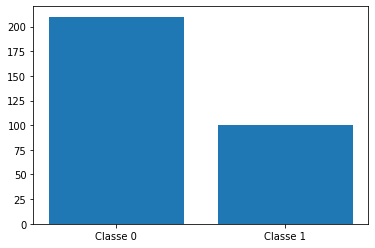

In [5]:
from imblearn.under_sampling import NearMiss
class0 = dts[0][dts[1]==0]
class1 = dts[0][dts[1]==1]

target_count = [len(class0),len(class1)]
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
plott = plt.bar([0,1], target_count)
plt.xticks([0,1], ('Classe 0', 'Classe 1'))
plt.show()



In [0]:
import math
def arredonda(num):
  if (num-math.trunc(num)) >=0.5:
    return(math.trunc(num)+1)
  else:
    return(math.trunc(num))


In [7]:
import random
import math
import numpy as np 
import time

posicoes=[]

inicio = time.time()
def fitness_function(position):
  total=0
  x1 = arredonda(position[0])
  x2 = arredonda(position[1])
  total = (1/analise2(X,y,x1,x2))
    #print(x," - ",total)
  return total

#Some variables to calculate the velocity
W = 0.5
c1 = 1
c2 = 1
target = 1

n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the target error: "))
n_particles = int(input("Inform the number of particles: "))

particle_position_vector = np.array([np.array([(random.random()*10)+1, (random.random()*10)+1]) for _ in range(n_particles)])
print(particle_position_vector)
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print(fitness_cadidate, ' ', particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]

    if(abs(gbest_fitness_value - target) < target_error):
        break
    
    for i in range(n_particles):
        posicoes.append(particle_position_vector)
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
    
    iteration = iteration + 1
fim = time.time()

print(gbest_fitness_value,"The best position is ", gbest_position, "in iteration number ", iteration)
print("Tempo:",(fim-inicio))

Inform the number of iterations: 10
Inform the target error: 0.1
Inform the number of particles: 10
[[ 6.67187059  9.71839536]
 [ 4.4568814   3.30414146]
 [ 9.05439039  7.18506346]
 [ 7.49295354  6.36706983]
 [ 2.13529997  2.1483727 ]
 [ 9.07028509  3.33439001]
 [ 2.97325562  2.72447316]
 [ 9.30853367 10.28707614]
 [ 2.46059687  3.57236699]
 [ 7.32950984  8.68731095]]
1.4298953916952513   [6.67187059 9.71839536]
1.421957671957672   [4.4568814  3.30414146]
1.340895341802783   [9.05439039 7.18506346]
1.4320017228383763   [7.49295354 6.36706983]
1.600217601547389   [2.13529997 2.1483727 ]
1.482953779814041   [9.07028509 3.33439001]
1.633990147783251   [2.97325562 2.72447316]
1.4502333658960165   [ 9.30853367 10.28707614]
1.5791423543576923   [2.46059687 3.57236699]
1.3601263601263602   [7.32950984 8.68731095]
1.4298953916952513   [6.99477826 9.37504783]
1.3848487367021276   [8.68752811 6.87538188]
1.441081081081081   [9.05439039 7.18506346]
1.3704169285564634   [8.63038779 6.96294022]
1.4

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


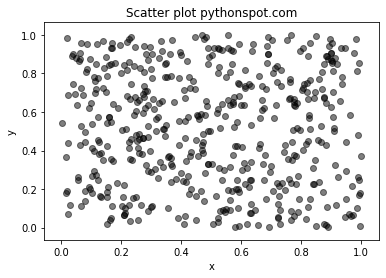

1292.0892853736877


In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#marcar tempo




fim = time.time()
print(fim - inicio)

**Genetic algorithm**

In [0]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

In [14]:
import numpy


"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = 6

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 10
num_parents_mating = 5

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

num_generations = 10
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

[[ 2.82599059  3.06970239  1.23367762 -1.07382377  2.23920775 -3.83535228]
 [-1.12791535 -2.14151858  2.61760196 -3.09887436  1.03480624  0.47549123]
 [-2.54890338 -3.9810585   0.48354559  0.18876164  0.28258762 -1.12731208]
 [-0.06692974  3.98495951  3.7586644  -0.63565477  2.83663455  2.75303624]
 [ 1.2387704   0.13119775 -3.13519415 -0.7180101   2.82864705  3.12863523]
 [-2.61151418  2.92766666  2.40644419 -1.28864814 -0.1473464  -0.07174476]
 [ 0.11861611 -3.30656472 -2.90736417  3.56734688 -2.30921412  2.24114752]
 [-2.3578122  -2.09463416 -3.66730135  0.28755122  0.07537553  2.07471744]
 [ 3.91096786 -0.87263003  2.76913199 -1.66277529  0.89553653  3.86745186]
 [-0.90734436 -3.32970014  0.28176067  3.06486252 -2.4489591  -2.28990227]]
Generation :  0
Best result :  80.73555574452216
Generation :  1
Best result :  80.73555574452216
Generation :  2
Best result :  80.73555574452216
Generation :  3
Best result :  82.4211116036832
Generation :  4
Best result :  82.4211116036832
Genera